In [3]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import pandas as pd
import string
from nltk.classify import accuracy
import pickle
import random, os
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from joblib import load
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

In [2]:
stop_words = set(stopwords.words('indonesian'))
factory = StemmerFactory()
stemmer = factory.create_stemmer()
def process_text(text):
    list_words = word_tokenize(str(text).lower())  # pastikan tipe string
    list_words = [word for word in list_words if word not in stop_words]
    list_words = [word for word in list_words if word not in string.punctuation]
    list_words = [word for word in list_words if word.isalpha()]
    list_words = [stemmer.stem(word) for word in list_words]
    return ' '.join(list_words)

df = pd.read_csv('detik_news_title.csv')
df['title'] = df['title'].apply(process_text)
df.to_csv('detik_news_title_clean.csv', index=False)

KeyboardInterrupt: 

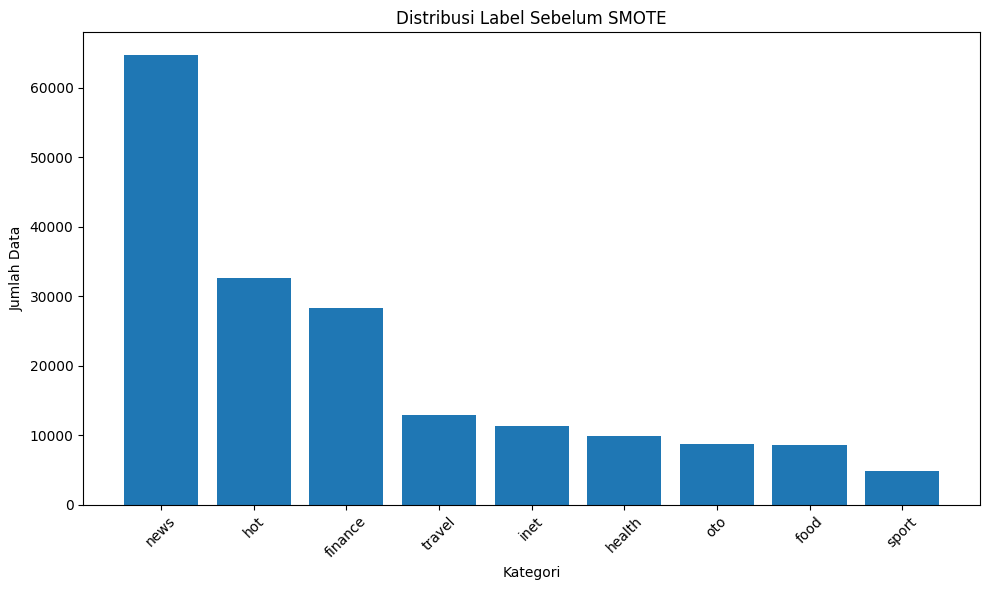

In [4]:
df = pd.read_csv('detik_news_title_clean.csv')
category_counts = df['category'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(category_counts.index, category_counts.values)
plt.xlabel("Kategori")
plt.ylabel("Jumlah Data")
plt.title("Distribusi Label Sebelum SMOTE")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
if os.path.exists('model_logreg.pickle') or os.path.exists('model_rf.pickle') or os.path.exists('count_vectorizer.pickle') or os.path.exists('tfidf_transformer.pickle'):
    with open('model_rf.pickle', 'rb') as f:
        model_rf = pickle.load(f)
    with open('count_vectorizer.pickle', 'rb') as f:
        count_vectorizer = pickle.load(f)
    with open('tfidf_transformer.pickle', 'rb') as f:
        tfidf_transformer = pickle.load(f)
else:
    # Load data
    df = pd.read_csv('detik_news_title_clean.csv')
    df = df.dropna()

    # Vectorizer dan TF-IDF transformer
    count_vectorizer = CountVectorizer()
    counts = count_vectorizer.fit_transform(df['title'])

    tfidf_transformer = TfidfTransformer()
    X = tfidf_transformer.fit_transform(counts)

    y = df['category']

    # Train test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
    model_rf.fit(X_train, y_train)
    y_pred_rf = model_rf.predict(X_test)
    print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
    print("\nRandom Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

    with open('model_rf.pickle', 'wb') as f:
        pickle.dump(model_rf, f)
    with open('count_vectorizer.pickle', 'wb') as f:
        pickle.dump(count_vectorizer, f)
    with open('tfidf_transformer.pickle', 'wb') as f:
        pickle.dump(tfidf_transformer, f)

Random Forest Accuracy: 0.9605274000824062

Random Forest Classification Report:
               precision    recall  f1-score   support

     finance       0.96      0.97      0.96      5513
        food       0.97      0.96      0.97      1747
      health       0.93      0.91      0.92      1867
         hot       0.96      0.98      0.97      6715
        inet       0.97      0.91      0.94      2225
        news       0.96      0.98      0.97     13099
         oto       0.98      0.92      0.95      1767
       sport       0.97      0.93      0.95       939
      travel       0.95      0.94      0.95      2533

    accuracy                           0.96     36405
   macro avg       0.96      0.94      0.95     36405
weighted avg       0.96      0.96      0.96     36405



In [7]:
def predict_category(text):
    # Load models and transformers
    with open('model_rf.pickle', 'rb') as f:
        model_rf = pickle.load(f)
    with open('count_vectorizer.pickle', 'rb') as f:
        count_vectorizer = pickle.load(f)
    with open('tfidf_transformer.pickle', 'rb') as f:
        tfidf_transformer = pickle.load(f)

    # Preprocess input
    cleaned = process_text(text)
    # Vectorize and transform
    counts = count_vectorizer.transform([cleaned])
    X = tfidf_transformer.transform(counts)
    # Predict
    prediction = model_rf.predict(X)
    print("Cleaned text:", cleaned)  # Setelah preprocessing
    print("Count Vector:", counts.toarray())  # Sebelum TF-IDF
    print("TF-IDF Vector:", X.toarray())  # Sebelum prediksi
    return prediction[0]

user_input = input("Masukkan judul atau teks: ")
hasil = predict_category(user_input)
print("Kategori yang diprediksi:", hasil)


Cleaned text: prabowo hamil
Count Vector: [[0 0 0 ... 0 0 0]]
TF-IDF Vector: [[0. 0. 0. ... 0. 0. 0.]]
Kategori yang diprediksi: hot
